In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip -q "gdrive/My Drive/data colab project emotion recognition/data.zip"

In [3]:
import pandas as pd
import numpy as np
import cv2
import glob
import warnings
from keras.layers import Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam




warnings.simplefilter('ignore')

Using TensorFlow backend.


In [0]:
def read_images(path,emotion) :
    images = []
    labels = []
    for img in glob.glob(path+"/"+emotion+"/*.png") :
        n = cv2.imread(img)
        images.append(n)
        labels.append(emotion)
    return labels,images    

In [0]:
def read_images_gray(path,emotion) :
    images = []
    labels = []
    for img in glob.glob(path+"/"+emotion+"/*.png") :
        n = cv2.imread(img)
        n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY)
        images.append(n)
        labels.append(emotion)
    return labels,images 

In [0]:
labels,images_happy = read_images("data/train","happy")

In [0]:
labels,images_happy = read_images("data/test","happy")

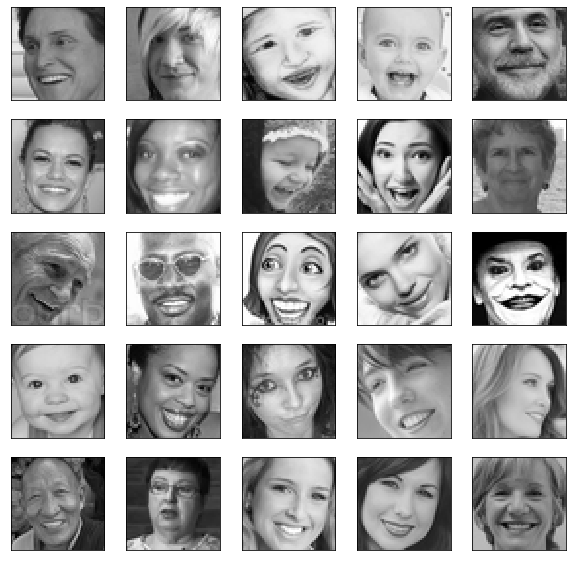

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25) :
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_happy[i],cmap = plt.cm.binary)

In [0]:
labels_full = ['angry','disgusted','fearful','happy','neutral','sad','surprised']
full_Images = []
full_Labels = []
for label in labels_full :
    labels,images = read_images("data/train",label)
    #labels,images = read_images_gray("data/train",label)
    full_Images = full_Images + images
    full_Labels = full_Labels + labels 

In [0]:
for label in labels_full :
    labels,images = read_images("data/test",label)
    #labels,images = read_images_gray("data/test",label)
    full_Images = full_Images + images
    full_Labels = full_Labels + labels 

In [0]:
X = np.array(full_Images)

In [0]:
dic = {'angry' : 0 , 'disgusted' : 1,'fearful' :2 , 'happy' : 3,'neutral':4,'sad':5,'surprised':6}

In [0]:
inv_dic = {v: k for k, v in dic.items()}

In [0]:
y = np.array(full_Labels)

for i,element in enumerate(y) :
    if element == 'angry' :
        y[i] = 0
    elif element == 'disgusted' :
        y[i]= 1
    elif element == 'fearful' :
        y[i] = 2
    elif element == 'happy' :
        y[i] = 3
    elif element == 'neutral' :
        y[i] = 4 
    elif element == 'sad' :
        y[i] = 5
    else :
        y[i] = 6

In [0]:
from sklearn.utils import shuffle
import numpy as np


X, y = shuffle(X, y)

In [0]:
from keras import utils 

y = utils.to_categorical(y,7)

In [17]:
print(X.shape)
print(y.shape)

(35887, 48, 48, 3)
(35887, 7)


In [0]:
from numpy import save

save('X.npy',X)
save('Y.npy',y)

In [0]:
#X = X.reshape(X.shape[0], 48, 48, 1)

**Model 1 :**

In [20]:
from keras.layers import Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu',input_shape=(48,48,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(256,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())


model.add(Dense(1024,kernel_regularizer=l2(0.001),activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7,activation='softmax'))

model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 42, 42, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 21, 64)        0   

In [21]:
batch = 32
epoch = 50


#from keras import optimizers

#optimus_prime = optimizers.Adam(lr=0.002, beta_1=0.85, beta_2=0.999, amsgrad=False)


model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X,y,validation_split=0.1,batch_size = batch,epochs = epoch)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 32298 samples, validate on 3589 samples
Epoch 1/50
32298/32298 [==============================] - 23s 702us/step - loss: 2.4092 - acc: 0.2991 - val_loss: 2.2054 - val_acc: 0.2831
Epoch 2/50
32298/32298 [==============================] - 15s 473us/step - loss: 1.7006 - acc: 0.4106 - val_loss: 1.7666 - val_acc: 0.3736
Epoch 3/50
32298/32298 [==============================] - 15s 473us/step - loss: 1.5738 - acc: 0.4674 - val_loss: 1.4251 - val_acc: 0.5277
Epoch 4/50
32298/32298 [==============================] - 15s 472us/step - loss: 1.4997 - acc: 0.5042 - val_loss: 1.4293 - val_acc: 0.5364
Epoch 5/50
32298/32298 [==============================] - 15s 473us/step - loss: 1.4582 - acc: 0.5186 - val_loss: 1.4054 - val_acc: 0.5534
Epoch 6/50
32298/32298 [==============================] - 15s 471us/step - loss: 1.4210 - acc: 0.5385 - val_loss: 1.3957 - val_acc: 0.5483
Epoch 7/50
32298/32

**Model 1 + Data Augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest')

In [23]:
it = datagen.flow(X,y)
model.fit_generator(it,steps_per_epoch=200,epochs=100)

Epoch 1/100
200/200 [==============================] - 7s 33ms/step - loss: 1.9212 - acc: 0.3524
Epoch 2/100
200/200 [==============================] - 6s 32ms/step - loss: 1.8175 - acc: 0.3877
Epoch 3/100
200/200 [==============================] - 6s 32ms/step - loss: 1.7563 - acc: 0.4070
Epoch 4/100
200/200 [==============================] - 7s 33ms/step - loss: 1.7318 - acc: 0.4164
Epoch 5/100
200/200 [==============================] - 7s 33ms/step - loss: 1.7376 - acc: 0.4300
Epoch 6/100
200/200 [==============================] - 7s 33ms/step - loss: 1.6934 - acc: 0.4342
Epoch 7/100
200/200 [==============================] - 7s 33ms/step - loss: 1.6802 - acc: 0.4400
Epoch 8/100
200/200 [==============================] - 6s 32ms/step - loss: 1.7067 - acc: 0.4327
Epoch 9/100
200/200 [==============================] - 7s 33ms/step - loss: 1.6783 - acc: 0.4488
Epoch 10/100
200/200 [==============================] - 7s 33ms/step - loss: 1.6461 - acc: 0.4587
Epoch 11/100
200/200 [=======

**Model 2 :**

In [0]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2

In [0]:
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=(48,48,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=16, kernel_size=(7, 7), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(.5))

    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(.5))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(.5))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(.5))

    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=7, kernel_size=(3, 3), padding='same'))
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax',name='predictions'))

In [28]:
batch = 32
epoch = 100

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
fitting = model.fit(X,y,validation_split=0.2,batch_size = batch,epochs = epoch)

Train on 28709 samples, validate on 7178 samples
Epoch 1/100
28709/28709 [==============================] - 19s 672us/step - loss: 1.7329 - acc: 0.3129 - val_loss: 1.6253 - val_acc: 0.3787
Epoch 2/100
28709/28709 [==============================] - 17s 586us/step - loss: 1.5898 - acc: 0.3783 - val_loss: 1.5451 - val_acc: 0.4047
Epoch 3/100
28709/28709 [==============================] - 17s 580us/step - loss: 1.5017 - acc: 0.4146 - val_loss: 1.4441 - val_acc: 0.4288
Epoch 4/100
28709/28709 [==============================] - 17s 580us/step - loss: 1.4438 - acc: 0.4410 - val_loss: 1.4497 - val_acc: 0.4510
Epoch 5/100
28709/28709 [==============================] - 17s 577us/step - loss: 1.4111 - acc: 0.4547 - val_loss: 1.3022 - val_acc: 0.4907
Epoch 6/100
28709/28709 [==============================] - 17s 575us/step - loss: 1.3817 - acc: 0.4666 - val_loss: 1.3195 - val_acc: 0.4847
Epoch 7/100
28709/28709 [==============================] - 17s 579us/step - loss: 1.3609 - acc: 0.4751 - val_lo

In [0]:
def evaluation(Z):
    plt.style.use("ggplot")

    plt.figure(figsize=(20,8))
    plt.plot(Z.history["loss"], label="train_loss")
    plt.plot(Z.history["val_loss"], label="val_loss")
    plt.plot(Z.history['acc'], label="train_acc")
    plt.plot(Z.history['val_acc'], label="val_acc")
    plt.title("Training Loss and Accuracy on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")

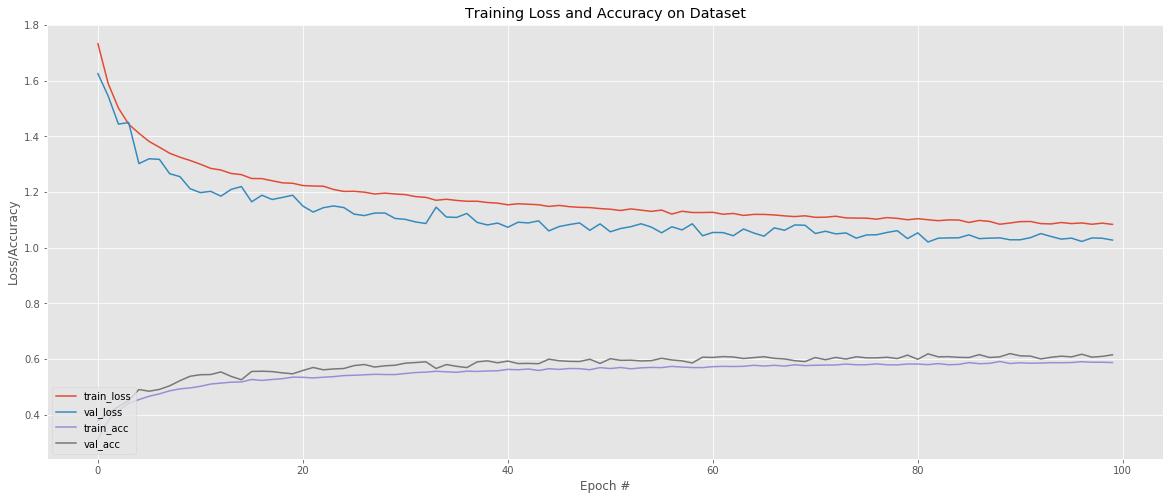

In [30]:
evaluation(fitting)

In [0]:
import dlib
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt


def detect_faces(image):

    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames

# Load image
img_path = '/content/70687789_2450227191687017_8151495203618816000_n.jpg'
image = io.imread(img_path)

# Detect faces
detected_faces = detect_faces(image)
tab_faces = [] 
# Crop faces and plot
for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    tab = np.asarray(face)
    tab_faces.append(tab)
    plt.subplot(1, len(detected_faces), n+1)
    plt.axis('off')
    plt.imshow(face)

In [0]:
image_to_predict = np.asarray(face)
img = cv2.resize(image_to_predict,(48,48),3)

In [0]:
tab = []
tab.append(img)
tab = np.array(tab)
print(inv_dic[np.argmax(model.predict(tab))])
plt.imshow(tab[0],cmap = plt.cm.binary)

In [0]:
for img in tab_faces :
  img = img = cv2.resize(img,(48,48),3)
  tab = []
  tab.append(img)
  tab = np.array(tab)
  print(inv_dic[np.argmax(model.predict(tab))])

happy
neutral


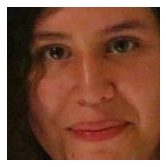

In [0]:
for i in range(len(tab_faces)) :
  plt.subplot(1, len(tab)+1, n+1)
  plt.axis('off')
  plt.imshow(tab_faces[i],cmap = plt.cm.binary)